In [1]:
import sys
# Hay que ejecutar esta línea antes de importar el módulo.
sys.path.append("C:/Users/poker/PycharmProjects/tgpy")
# Ahora se puede importar el módulo.
import tgpy as tg

In [2]:
npriors = 4 # 1, 2, 3, 4
ngroups = 4 # any positive int
nparams = 500 # number of chains
niters = 300 # number of iterations
nreview = 13 # number of review
rprior= 3
rgroup = 0
nitersSGD = 300

### Create Priors

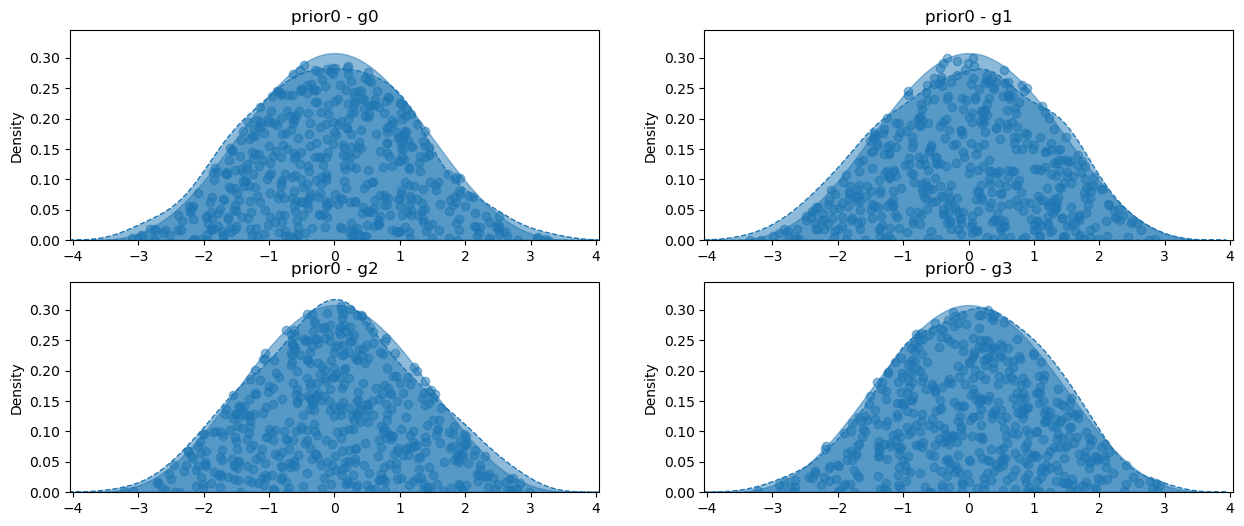

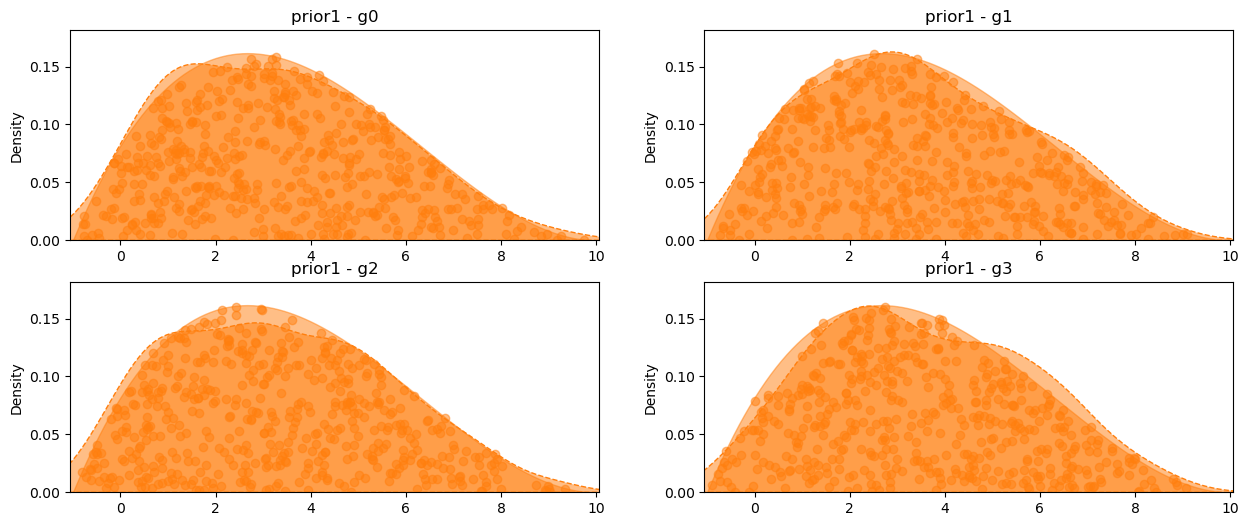

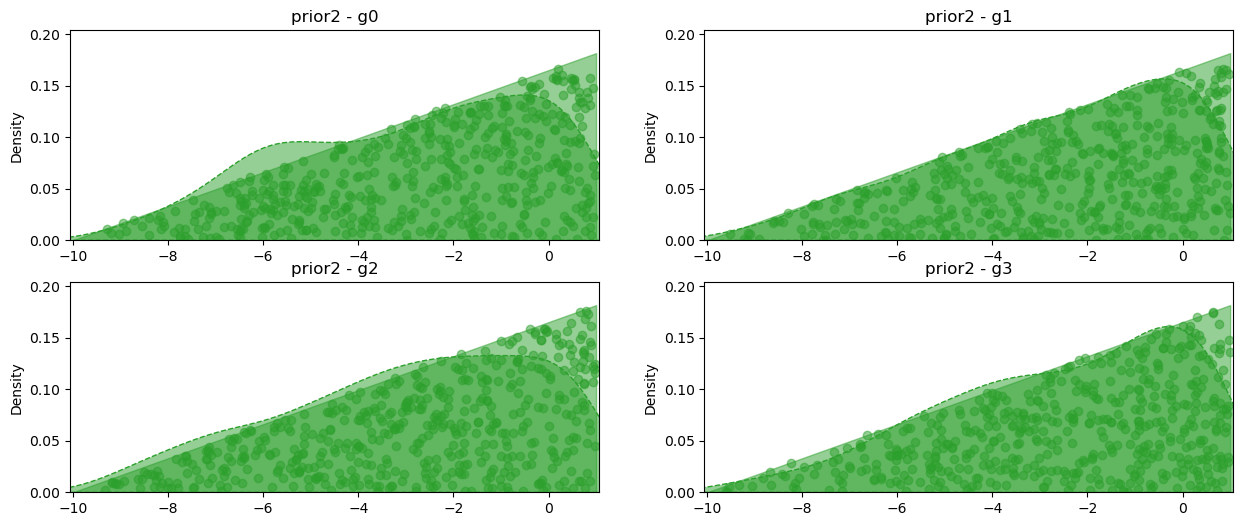

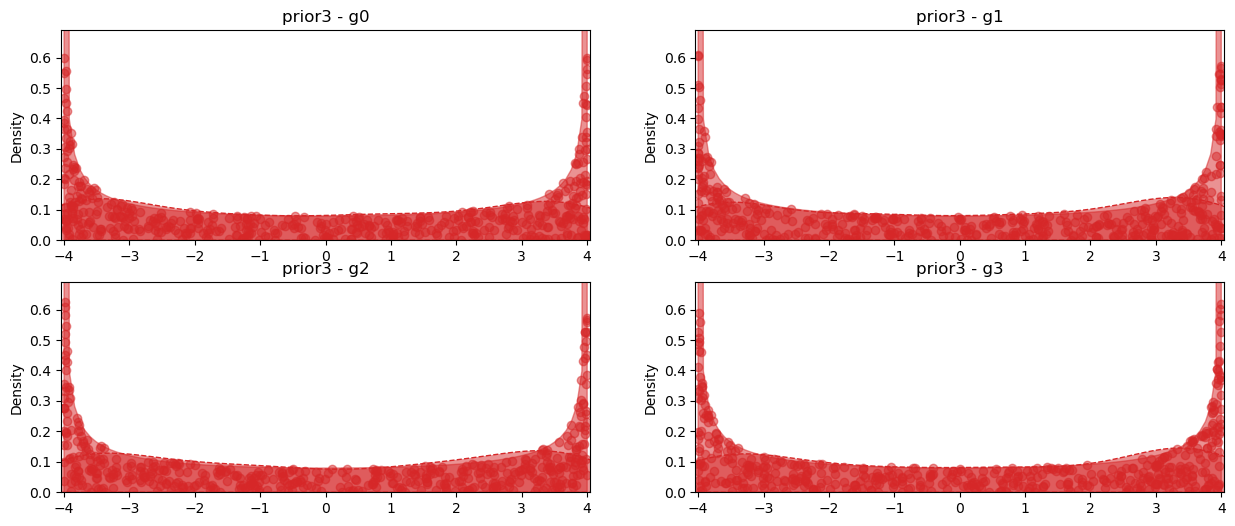

In [3]:
prior0 = tg.TgPrior('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=5, beta=5) # simetrico
prior1 = tg.TgPrior('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
prior2 = tg.TgPrior('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-10, high=1, alpha=2, beta=1) # masa a la derecha
prior3 = tg.TgPrior('prior3', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=0.5, beta=0.5) # doble masa

                    
if npriors == 1: 
    k = tg.DummyKernel(prior0)
elif npriors == 2:
    k = tg.DummyKernel(prior0, prior1)
elif npriors == 3:
    k = tg.DummyKernel(prior0, prior1, prior2) 
else:
    k = tg.DummyKernel(prior0, prior1, prior2, prior3) 


cov = tg.CovarianceTransport(k, noise=None)
tgp = tg.TGP([cov], dt=None, annealing=0)

tgp.sample_priors()
tgp.plot_priors()

In [4]:
# Se guarda el sample de cada grupo
sample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)        

### SGD

  0%|                                                                                                         …

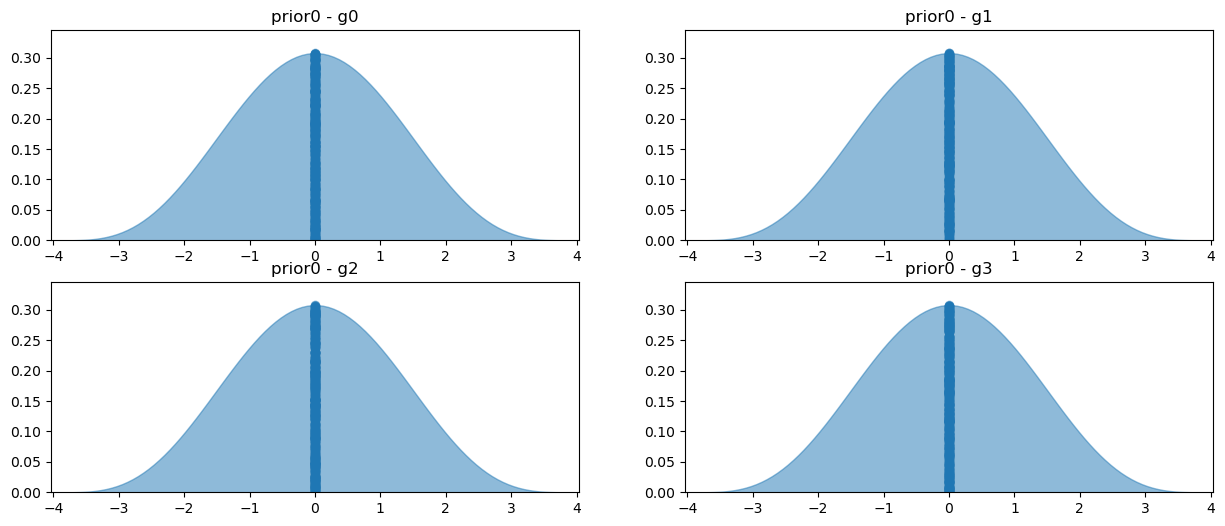

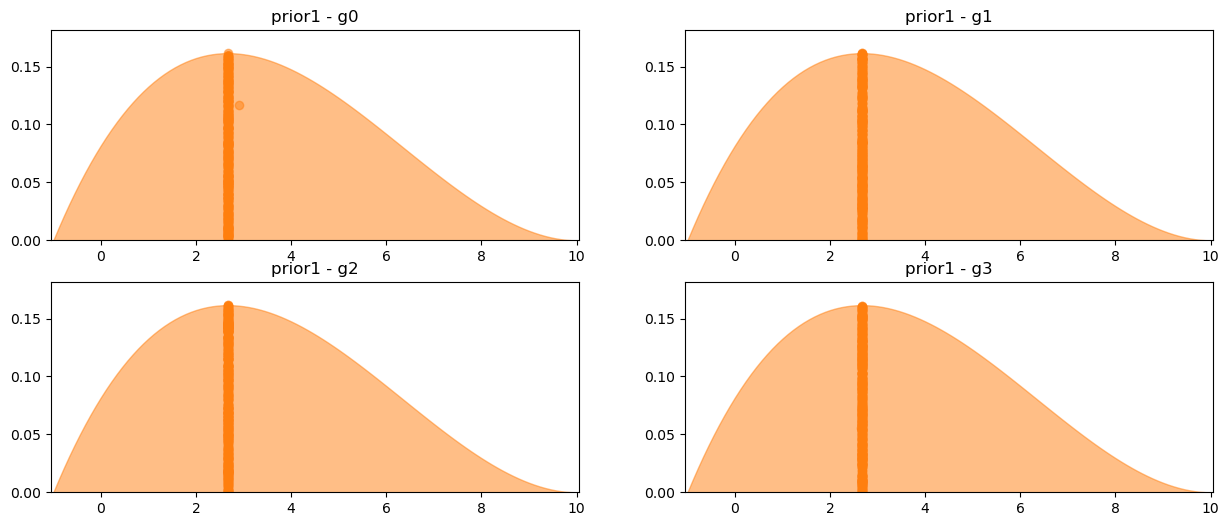

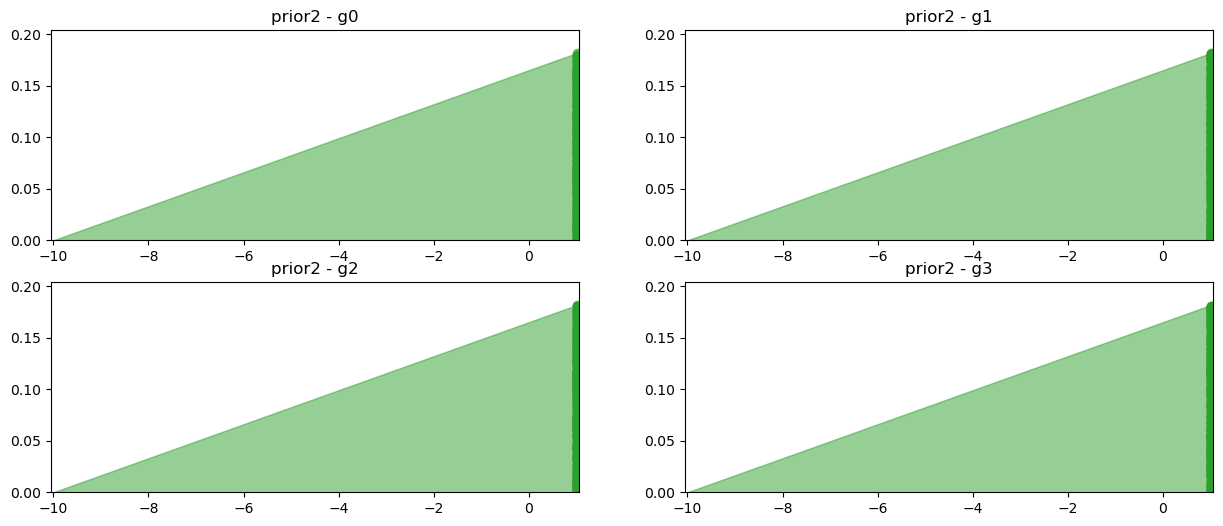

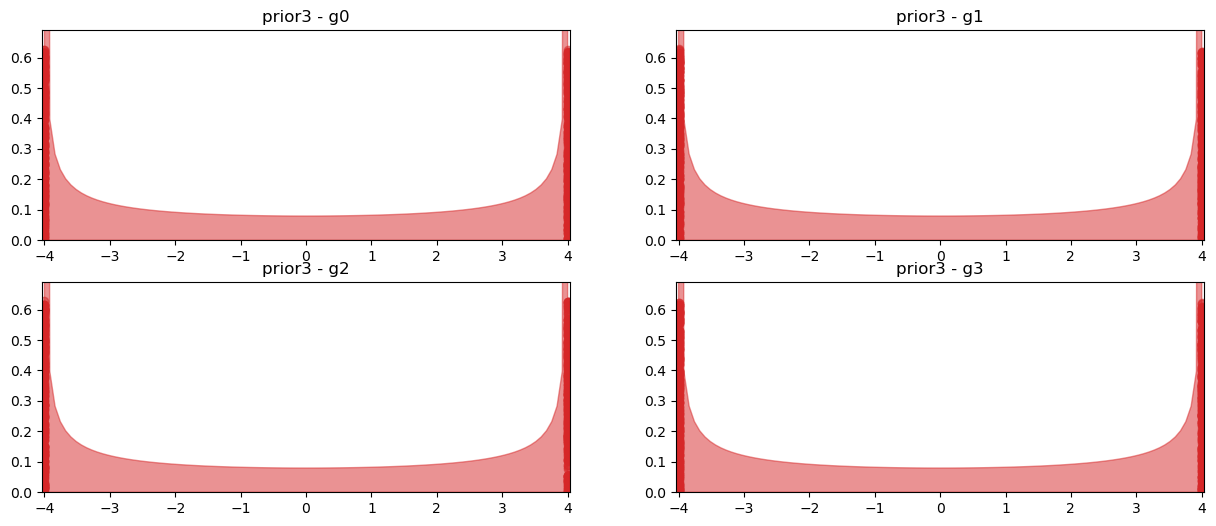

In [5]:
learning = tg.TgLearning(tgp, lr=0.1)
learning.execute_sgd(nitersSGD)
tgp.plot_priors(kde=False)

  0%|                                                                                                         …

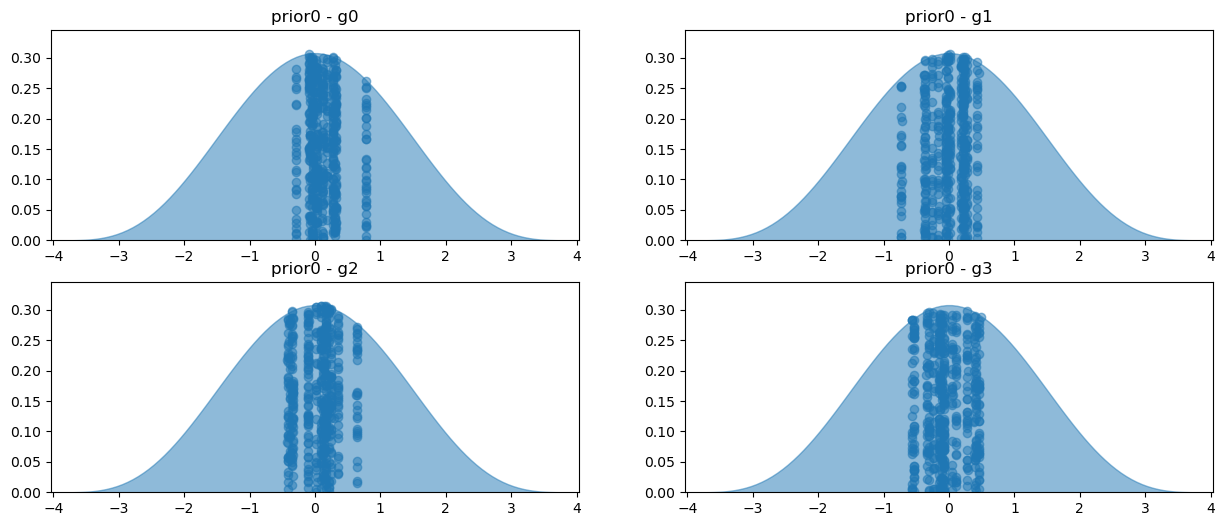

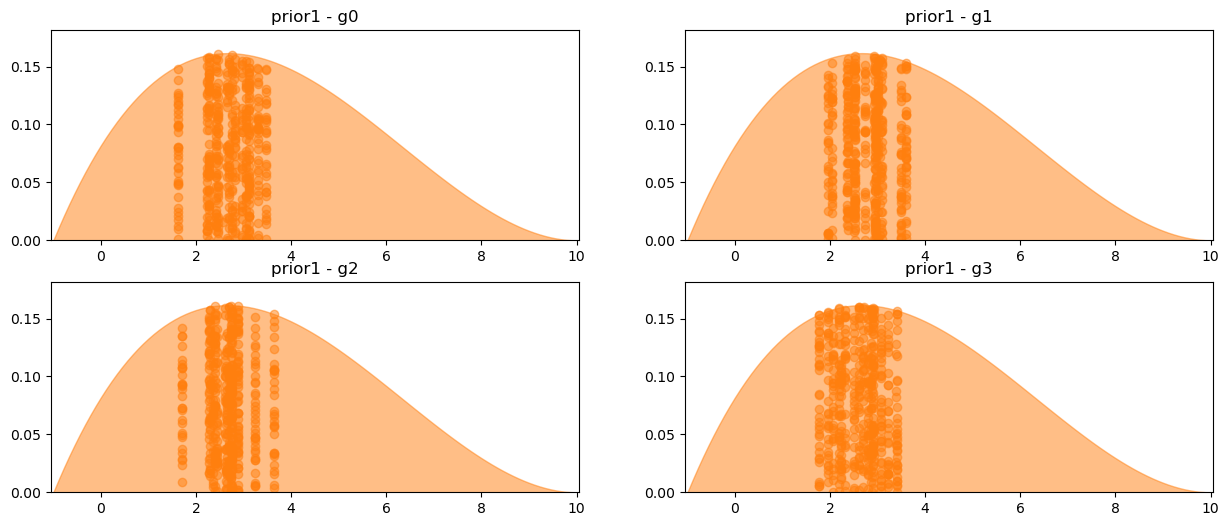

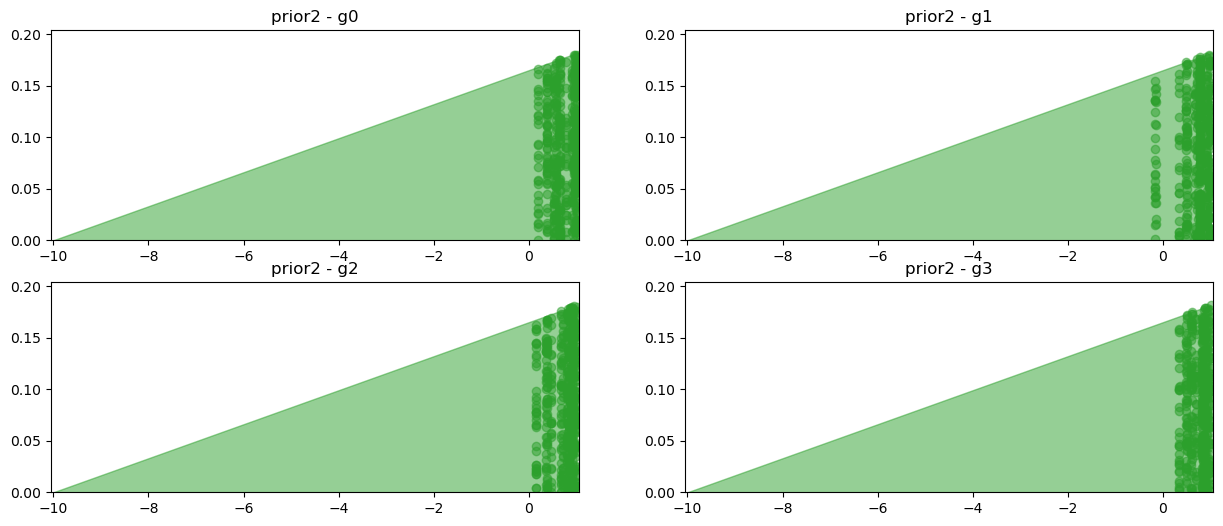

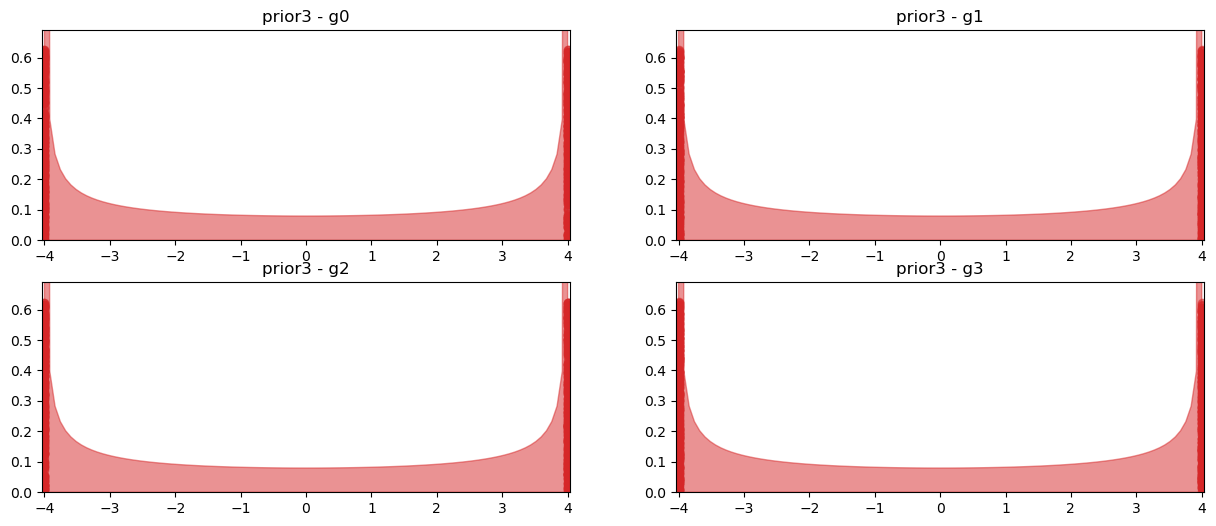

In [6]:
learning.execute_svgd(niters)
tgp.plot_priors(kde=False)

### SVGD

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

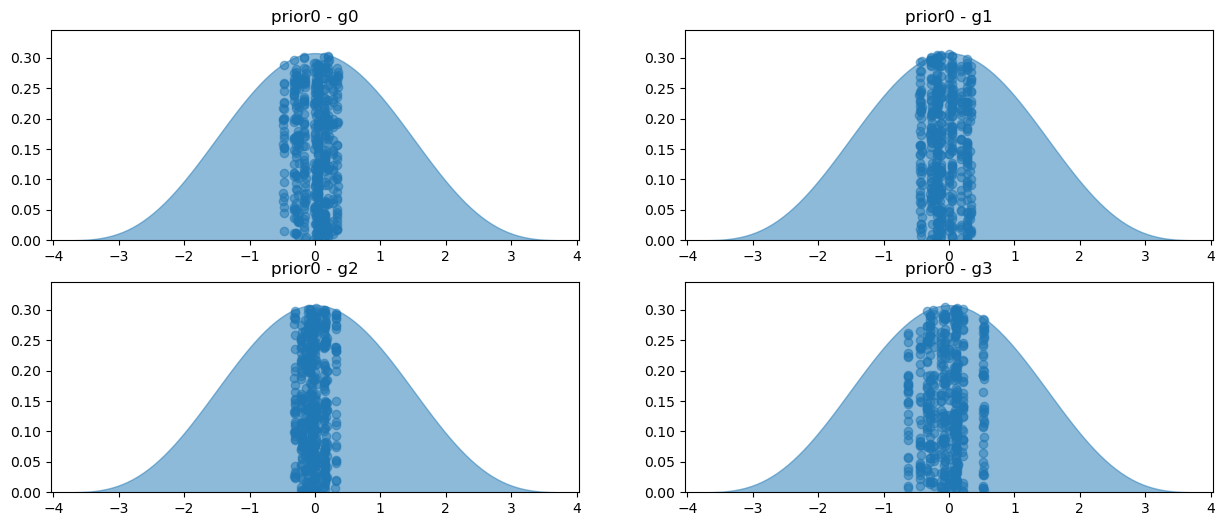

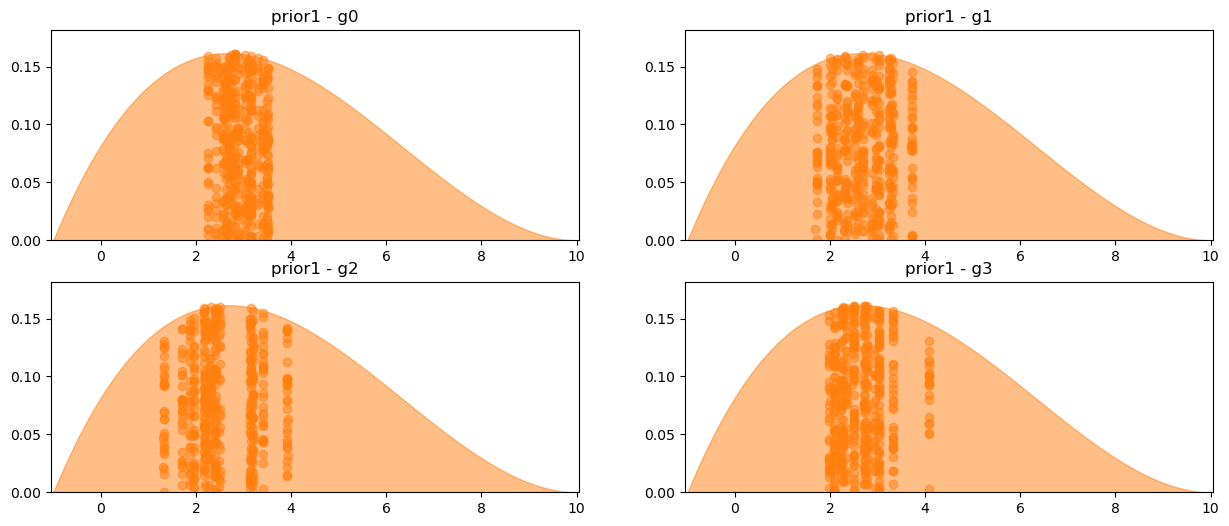

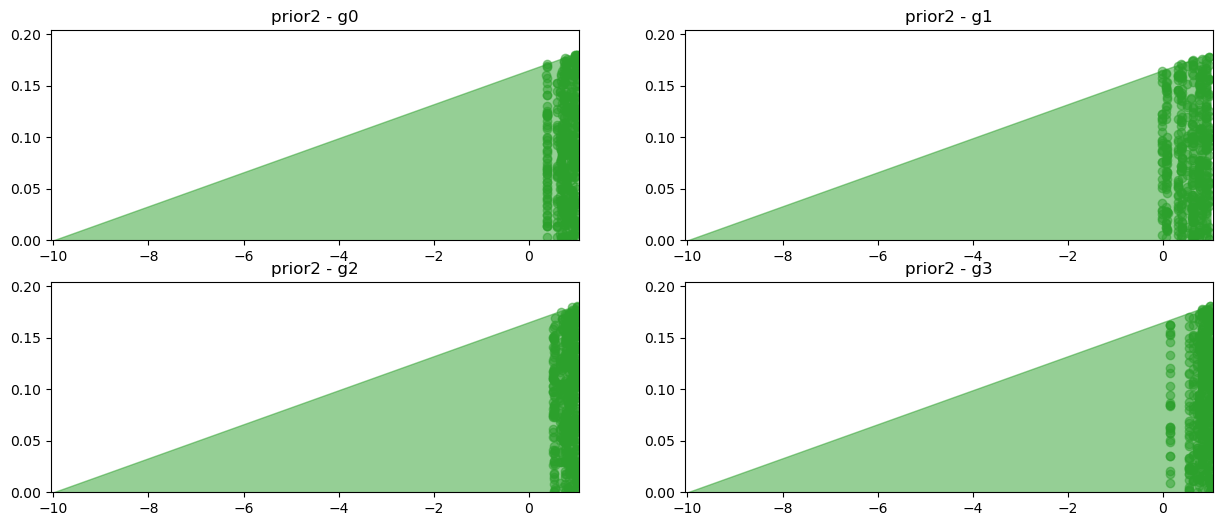

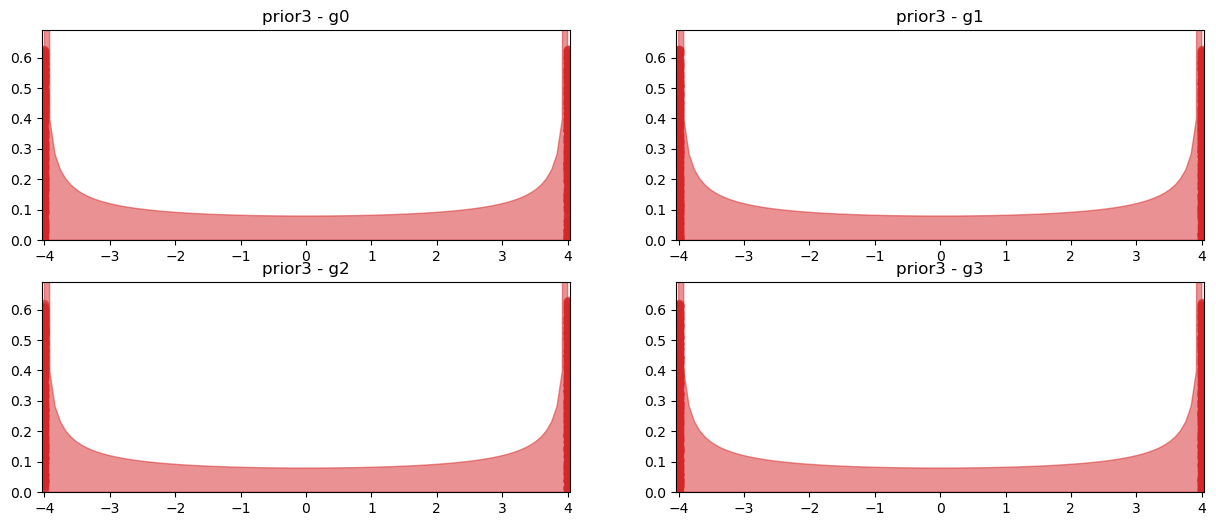

In [7]:
review_dict = learning.review(niters=niters, nreview=nreview, rprior=rprior, rgroup=rgroup) 
# hay alguna forma que salga las iteraciones totales en vez de 10 en 10 ?
tgp.plot_priors(kde=False)

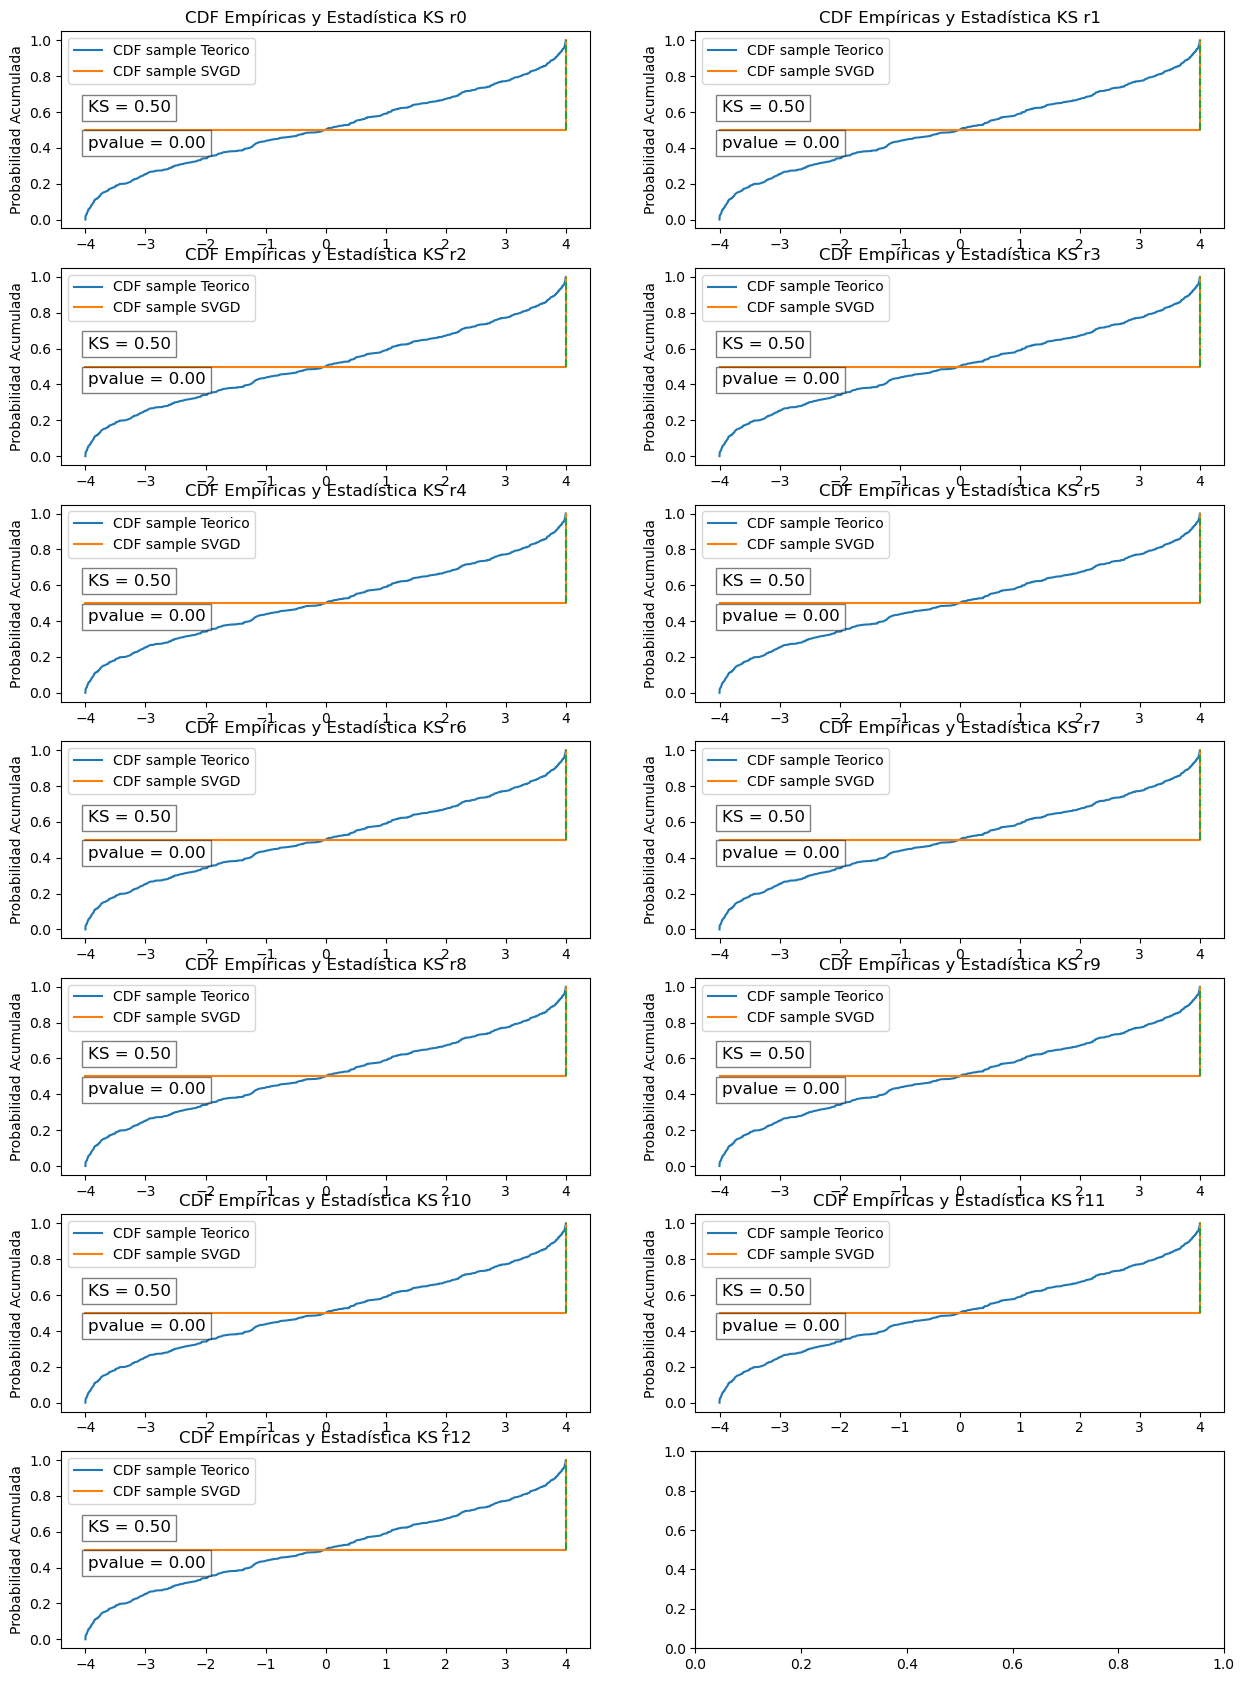

In [8]:
learning.plotKS(theorical=sample_theo, review_dict=review_dict, rprior=rprior, rgroup=rgroup)